<H3> Project  - 3 Application of Classification Models on Census Data - Adult Data set </H3>

<H3> Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
</H3>

<H3>
Problem 2:
Which factors are important
</H3>

<H3>
Problem 3:
Which algorithms are best for this dataset

</H3>

<H5> Importing Libraries </H5>

In [62]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import math


<H3> Loading of data into Train and Test </H3>

In [63]:
DATASET = ("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",)
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
training_raw = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       header=None,names=headers,na_values=["?"])
test_raw = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                      header=None,names=headers,na_values=["?"])

<H4> Dataset shape</H4>

In [64]:
training_raw.shape

(32561, 15)

In [65]:
test_raw.shape

(16282, 15)

<H3>Append both training and test data set into one another dataset </H3>

In [66]:
dataset_raw = training_raw.append(test_raw)

In [67]:
dataset_raw.shape

(48843, 15)

In [68]:
# Reset index to get the proper index after  appending training and test
dataset_raw.reset_index(drop = True, inplace = True)

In [69]:
# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

convert_size(dataset_raw.memory_usage().sum())

'5.59 MB'

In [70]:
# describe even object type columns
dataset_raw.describe(include=['O'])

,age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,48843,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,147,9,16,7,15,6,5,2,42,4
top,36,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,898,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [71]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
age               48843 non-null object
workclass         48842 non-null object
fnlwgt            48842 non-null float64
education         48842 non-null object
education-num     48842 non-null float64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null float64
capital-loss      48842 non-null float64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
predclass         48842 non-null object
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [72]:
dataset_raw.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [73]:
# drop na values
dataset_raw1 = dataset_raw.dropna()

In [74]:
dataset_raw1.shape

(48842, 15)

In [75]:
dataset_raw1.info

<bound method DataFrame.info of       age          workclass    fnlwgt      education  education-num  \
0      39          State-gov   77516.0      Bachelors           13.0   
1      50   Self-emp-not-inc   83311.0      Bachelors           13.0   
2      38            Private  215646.0        HS-grad            9.0   
3      53            Private  234721.0           11th            7.0   
4      28            Private  338409.0      Bachelors           13.0   
5      37            Private  284582.0        Masters           14.0   
6      49            Private  160187.0            9th            5.0   
7      52   Self-emp-not-inc  209642.0        HS-grad            9.0   
8      31            Private   45781.0        Masters           14.0   
9      42            Private  159449.0      Bachelors           13.0   
10     37            Private  280464.0   Some-college           10.0   
11     30          State-gov  141297.0      Bachelors           13.0   
12     23            Private  12

In [76]:
dataset_raw.dropna(inplace = True)

In [77]:
# Change the type of age column from object to numeric
dataset_raw["age"] = pd.to_numeric(dataset_raw["age"])

In [78]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48842
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null float64
education         48842 non-null object
education-num     48842 non-null float64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null float64
capital-loss      48842 non-null float64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
predclass         48842 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 6.0+ MB


In [79]:
cols = list(dataset_raw.columns)

In [80]:
cols = cols[1:]

In [81]:
len(cols)

14

<H3> Data Visualization </H3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000073547A3AC8>,
      dtype=object)

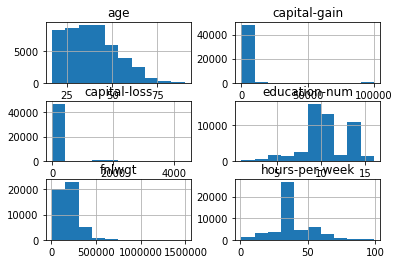

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset_raw.hist()

In [83]:
dataset_bin = pd.DataFrame() # To contain dataframe with discretised continuous variables 
dataset_con = pd.DataFrame() # To contain dataframe with continuous variables 

In [84]:
import seaborn as sns

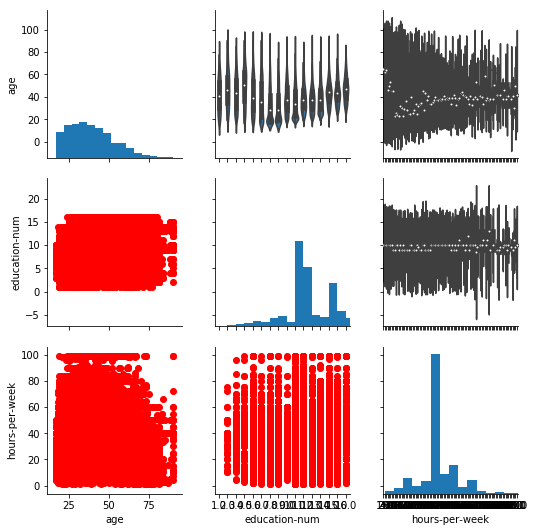

In [85]:
#Here we plot scatter plot, histogram and violin plot using Pair grid.  
g = sns.PairGrid(data=dataset_raw, vars = ['age', 'education-num', 'hours-per-week'])  
# with the help of the vars parameter we can select the variables between which we want the plot to be constructed.  
g.map_lower(plt.scatter, color='red')  
g.map_diag(plt.hist, bins=15)  
g.map_upper(sns.violinplot)

In [86]:
# Let's recode the Class Feature
dataset_raw.loc[dataset_raw['predclass'] == ' >50K', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == ' >50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == ' <=50K', 'predclass'] = 0
dataset_raw.loc[dataset_raw['predclass'] == ' <=50K.', 'predclass'] = 0

In [87]:
#if the distribution ofage column in different for diff predclass
dataset_raw['predclass'] == 0

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7        False
8        False
9        False
10       False
11       False
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19       False
20       False
21        True
22        True
23        True
24        True
25       False
26        True
27       False
28        True
29        True
         ...  
48813     True
48814    False
48815     True
48816    False
48817    False
48818     True
48819     True
48820     True
48821     True
48822     True
48823    False
48824     True
48825     True
48826     True
48827    False
48828     True
48829     True
48830     True
48831     True
48832     True
48833     True
48834     True
48835     True
48836     True
48837     True
48838     True
48839     True
48840     True
48841     True
48842    False
Name: predclass, Length: 48842, dtype: bool

In [89]:
dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

In [93]:
dataset_raw.age.value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [94]:
dataset_raw.age = dataset_raw.age.astype(float)

In [97]:
dataset_bin['age'] = pd.cut(dataset_raw['age'], 10) # discretised 
dataset_con['age'] = dataset_raw['age'] # non-discretised

C:\Users\ARVIND\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARVIND\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


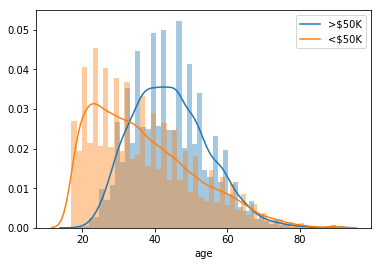

In [100]:
sns.distplot(dataset_raw.loc[dataset_raw['predclass'] == 1]['age'], kde_kws={"label": ">$50K"});
sns.distplot(dataset_raw.loc[dataset_raw['predclass'] == 0]['age'], kde_kws={"label": "<$50K"});

In [106]:
# Create buckets for Workclass
dataset_raw.loc[dataset_raw['workclass'] == 'Without-pay', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == 'Never-worked', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == 'Federal-gov', 'workclass'] = 'Fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'State-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'Local-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-emp'


dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

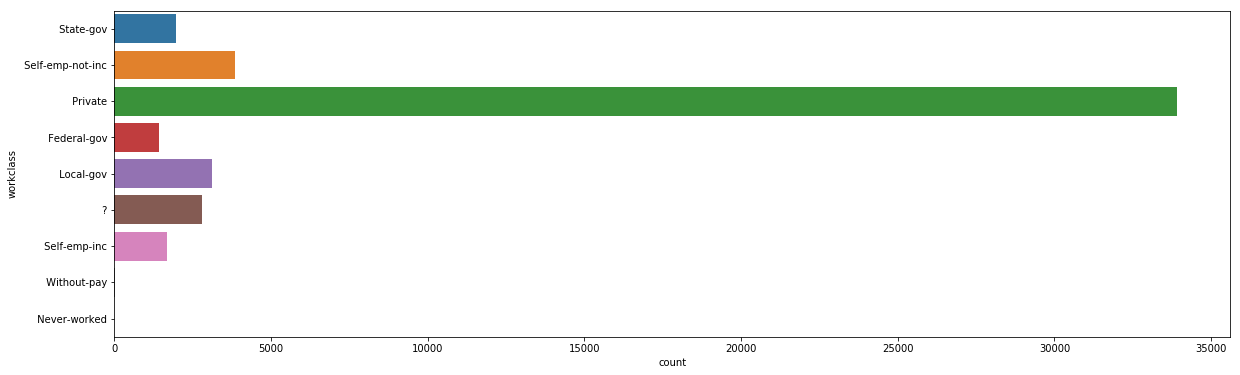

In [58]:
fig = plt.figure(figsize=(20,6)) 
sns.countplot(y="workclass", data=dataset_raw);

In [107]:
# Create buckets for Occupation
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'


dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

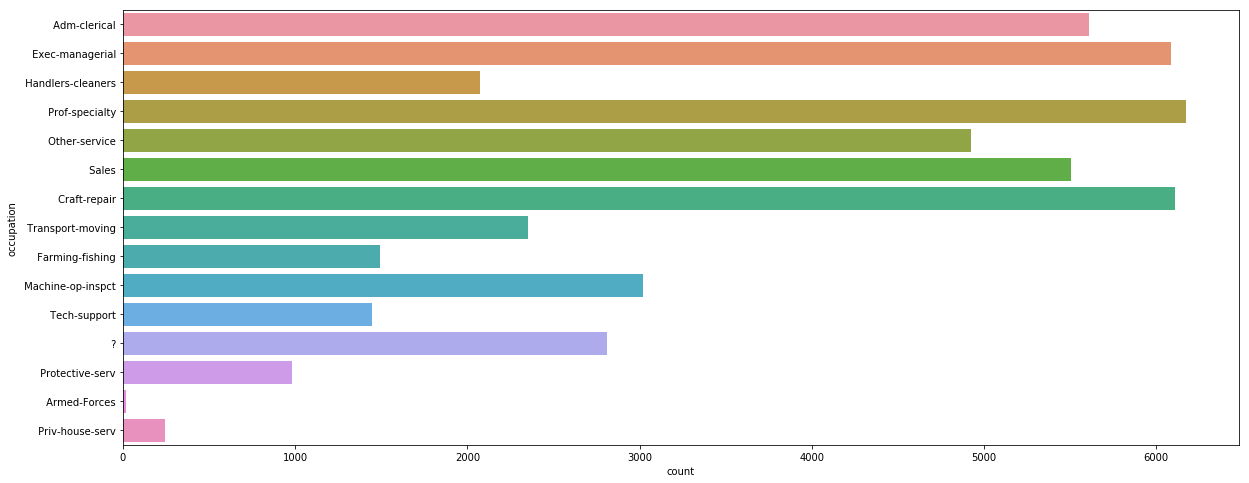

In [59]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y="occupation", data=dataset_raw);

In [108]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']

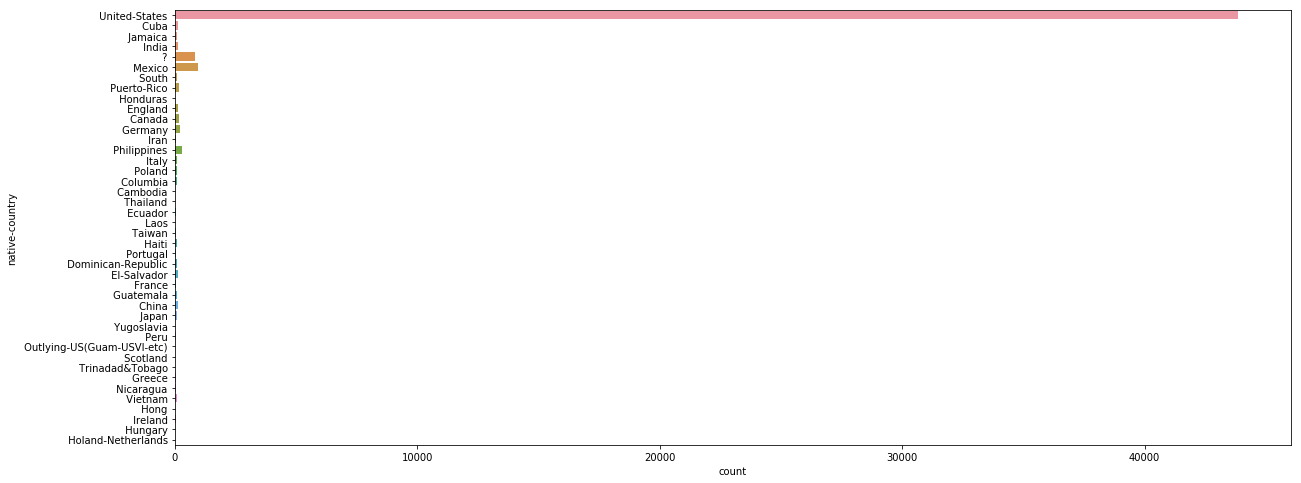

In [101]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y="native-country", data=dataset_raw);

In [109]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'


dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

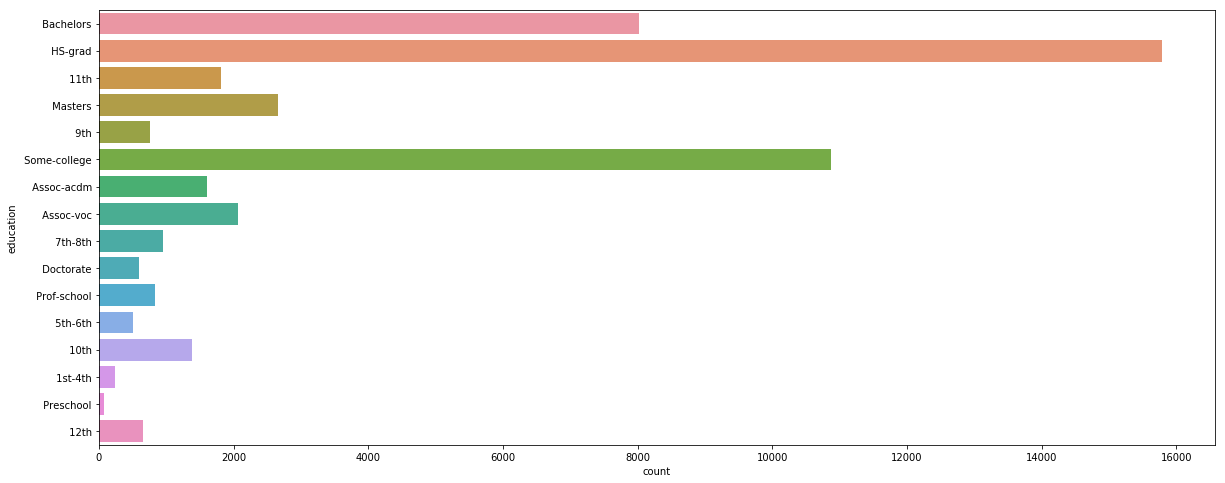

In [104]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y="education", data=dataset_raw);

In [110]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'


dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

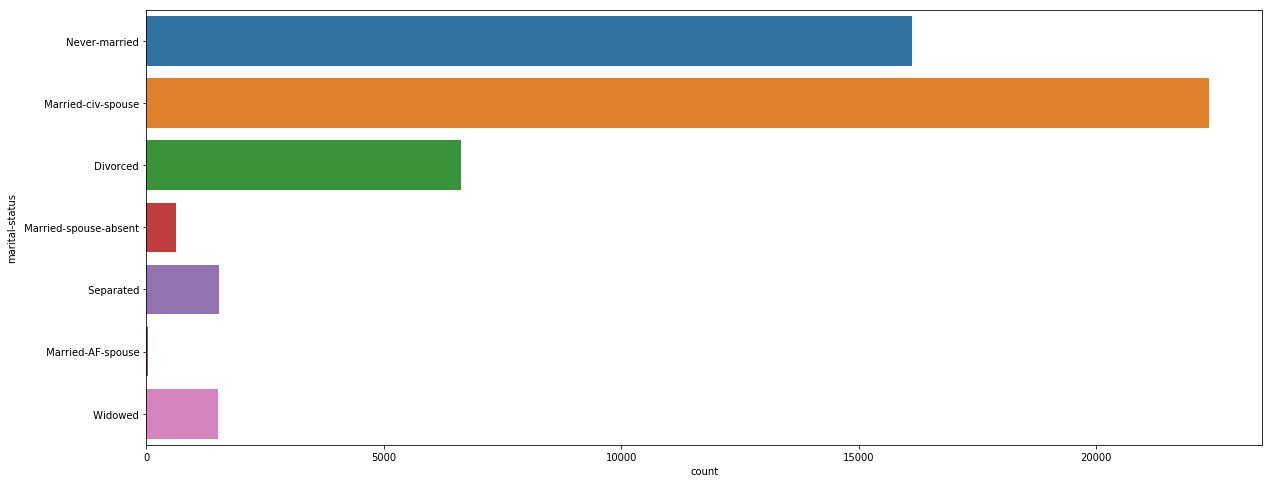

In [111]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y="marital-status", data=dataset_raw);

In [114]:
# use Cut function to bin the data in equally sized buckets
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']

In [117]:
# use the Cut function to bin the data in equally sized buckets
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'], 10)
dataset_con['education-num'] = dataset_raw['education-num']

In [118]:
# use Cut function to bin the data in equally sized buckets
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

In [119]:
# use the Cut function to bin the data in equally sized buckets
dataset_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 5)
dataset_con['capital-gain'] = dataset_raw['capital-gain']

In [120]:
# use the Cut function to bin the data in equally sized buckets
dataset_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 5)
dataset_con['capital-loss'] = dataset_raw['capital-loss']

In [121]:
dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']
dataset_con['relationship'] = dataset_bin['relationship'] = dataset_raw['relationship']

C:\Users\ARVIND\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


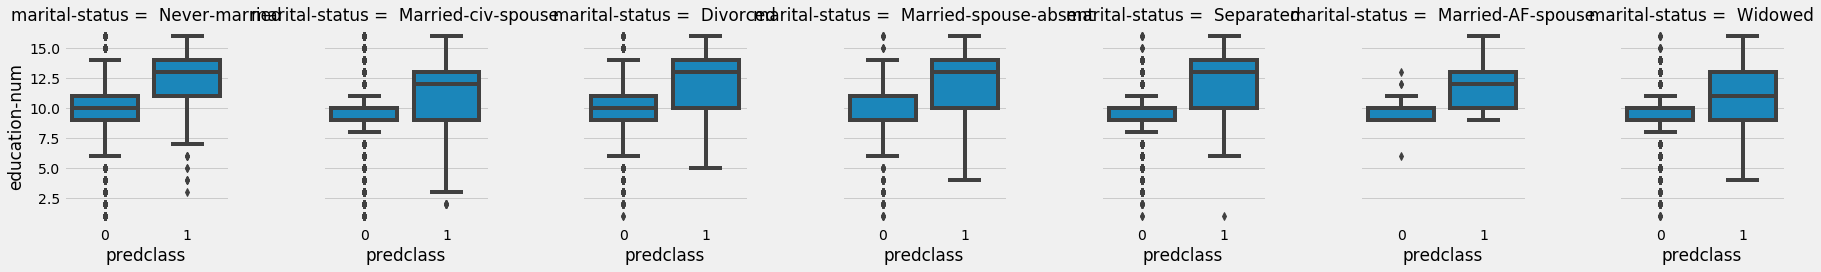

In [122]:
# Effect of Marital Status and Education on Income, across Marital Status.
plt.style.use('fivethirtyeight')
g = sns.FacetGrid(dataset_con, col='marital-status', size=4, aspect=.9)
g = g.map(sns.boxplot, 'predclass', 'education-num')

In [123]:
# creating interaction features
dataset_con['age-hours'] = dataset_con['age'] * dataset_con['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_con['age-hours'], 10)
dataset_con['age-hours'] = dataset_con['age-hours']

In [124]:
# One Hot Encoded (dummy variable creation) for all labels before performing Machine Learning
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('predclass')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,"age-hours_(12.111, 909.9]","age-hours_(909.9, 1798.8]","age-hours_(1798.8, 2687.7]","age-hours_(2687.7, 3576.6]","age-hours_(3576.6, 4465.5]","age-hours_(4465.5, 5354.4]","age-hours_(5354.4, 6243.3]","age-hours_(6243.3, 7132.2]","age-hours_(7132.2, 8021.1]","age-hours_(8021.1, 8910.0]"
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [125]:
# Label Encode all labels
dataset_con_enc = dataset_con.apply(LabelEncoder().fit_transform)
dataset_con_enc.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours
0,0,22,7,1,39,9,4,3461,12,39,27,0,1,4,1,695
1,0,33,6,4,39,9,2,3788,12,12,0,0,1,4,0,334
2,0,21,4,6,39,11,0,18342,8,39,0,0,1,4,1,683
3,0,36,4,6,39,1,2,19995,6,39,0,0,1,2,0,890
4,0,11,4,10,5,9,2,25405,12,39,0,0,0,2,5,530


In [139]:
#apply standard scaler
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(dataset_bin_enc.drop('predclass', axis=1))
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [140]:
X = std_scale.transform(dataset_bin_enc.drop('predclass', axis=1))
X

array([[-0.45679451, -0.46508752, -0.47916144, ..., -0.01357577,
        -0.00639922, -0.00639922],
       [-0.45679451, -0.46508752, -0.47916144, ..., -0.01357577,
        -0.00639922, -0.00639922],
       [-0.45679451, -0.46508752,  2.08697927, ..., -0.01357577,
        -0.00639922, -0.00639922],
       ...,
       [-0.45679451, -0.46508752,  2.08697927, ..., -0.01357577,
        -0.00639922, -0.00639922],
       [-0.45679451, -0.46508752, -0.47916144, ..., -0.01357577,
        -0.00639922, -0.00639922],
       [-0.45679451, -0.46508752,  2.08697927, ..., -0.01357577,
        -0.00639922, -0.00639922]])

In [141]:
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('predclass', axis=1))
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
X = std_scale.transform(dataset_con_enc.drop('predclass', axis=1))
X

array([[ 0.02599598,  2.13735875, -1.3184598 , ...,  0.39238393,
        -0.2766849 ,  0.06278054],
       [ 0.82830842,  1.45440066, -0.60931809, ...,  0.39238393,
        -0.9008521 , -1.34611536],
       [-0.04694151,  0.08848448, -0.13655694, ...,  0.39238393,
        -0.2766849 ,  0.01594744],
       ...,
       [-0.04694151,  0.08848448,  0.80896535, ...,  0.39238393,
        -0.9008521 ,  0.54281987],
       [ 0.39068346,  0.08848448, -1.3184598 , ..., -3.15381034,
         0.97164949,  0.33987641],
       [-0.26575399,  0.77144257, -0.60931809, ...,  0.39238393,
        -0.9008521 ,  0.79259643]])

In [143]:
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('predclass', axis=1))
X = std_scale.transform(dataset_con_enc.drop('predclass', axis=1))

In [144]:
y = dataset_con_enc['predclass']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: predclass, dtype: int64

In [150]:
selected_dataset = dataset_con_enc
selected_dataset.head(2)

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours
0,0,22,7,1,39,9,4,3461,12,39,27,0,1,4,1,695
1,0,33,6,4,39,9,2,3788,12,12,0,0,1,4,0,334


In [151]:
# Splitting the Training and Test data sets
from sklearn import cross_validation as cv
train, test = cv.train_test_split(selected_dataset,test_size=0.20,random_state=1234)

In [152]:
train.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours
32722,0,38,4,8,39,1,2,1527,6,29,0,0,1,4,0,726
36171,0,6,4,8,39,15,4,25700,9,39,0,0,1,4,3,445
19838,0,7,6,14,39,15,2,11867,9,59,0,0,1,4,0,654
4878,1,29,4,4,39,15,2,3189,9,39,0,0,0,4,5,796
45985,0,30,2,10,39,9,4,22579,12,49,0,0,0,4,1,964


In [153]:
test.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours
48406,0,20,4,6,26,15,2,19503,9,39,0,0,1,3,0,669
39568,0,25,4,1,39,15,0,2237,9,39,0,0,0,4,4,738
8866,0,40,6,5,39,7,3,12992,11,39,0,0,1,0,4,943
47147,0,40,6,1,39,11,2,4868,8,15,0,0,0,4,5,442
29582,0,6,0,0,39,15,4,20277,9,29,0,0,1,4,3,351


In [154]:
#drop the na values
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [155]:
X_train_w_label = train
X_train = train.drop(['predclass'], axis=1)
y_train = train['predclass'].astype('int64')
X_test  = test.drop(['predclass'], axis=1)
y_test  = test['predclass'].astype('int64')

In [156]:
X_train.shape

(39073, 15)

In [157]:
X_train.head()

,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours
32722,38,4,8,39,1,2,1527,6,29,0,0,1,4,0,726
36171,6,4,8,39,15,4,25700,9,39,0,0,1,4,3,445
19838,7,6,14,39,15,2,11867,9,59,0,0,1,4,0,654
4878,29,4,4,39,15,2,3189,9,39,0,0,0,4,5,796
45985,30,2,10,39,9,4,22579,12,49,0,0,0,4,1,964


In [158]:
y_train.head()

32722    0
36171    0
19838    0
4878     1
45985    0
Name: predclass, dtype: int64

<H3> Different Algorithms</H3>

In [186]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [187]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            


In [188]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



In [189]:
# Logistic Regression
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

C:\Users\ARVIND\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Accuracy: 81.67
Accuracy CV 10-Fold: 82.04


In [190]:
print (metrics.classification_report(y_train, train_pred_log))

             precision    recall  f1-score   support

          0       0.84      0.94      0.89     29771
          1       0.70      0.43      0.53      9302

avg / total       0.81      0.82      0.80     39073



In [191]:
print (metrics.classification_report(y_test, test_pred_log))

             precision    recall  f1-score   support

          0       0.84      0.94      0.89      7384
          1       0.70      0.43      0.53      2385

avg / total       0.80      0.82      0.80      9769



In [192]:
# k-Nearest Neighbors
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 74.55
Accuracy CV 10-Fold: 75.18


In [193]:
print (metrics.classification_report(y_train, train_pred_knn))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84     29771
          1       0.47      0.34      0.39      9302

avg / total       0.73      0.75      0.74     39073



In [185]:
print (metrics.classification_report(y_test, test_pred_knn))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84      7384
          1       0.47      0.34      0.40      2385

avg / total       0.72      0.75      0.73      9769



In [172]:
# Decision Tree Classifier
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 80.63
Accuracy CV 10-Fold: 81.45


In [182]:
print (metrics.classification_report(y_train, train_pred_dt))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88     29771
          1       0.61      0.62      0.61      9302

avg / total       0.82      0.81      0.81     39073



In [183]:
print (metrics.classification_report(y_test, test_pred_dt))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87      7384
          1       0.60      0.61      0.61      2385

avg / total       0.81      0.81      0.81      9769



In [174]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [175]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)

Accuracy: 85.33
Accuracy CV 10-Fold: 85.83


In [176]:
print (metrics.classification_report(y_train, train_pred_rf)) 

             precision    recall  f1-score   support

          0       0.89      0.93      0.91     29771
          1       0.74      0.62      0.67      9302

avg / total       0.85      0.86      0.85     39073



In [177]:
print (metrics.classification_report(y_test, test_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91      7384
          1       0.74      0.61      0.67      2385

avg / total       0.85      0.85      0.85      9769



In [178]:
# Gradient Boosting Trees
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 86.25
Accuracy CV 10-Fold: 86.63


In [181]:
print (metrics.classification_report(y_train, train_pred_gbt)) 

             precision    recall  f1-score   support

          0       0.88      0.95      0.92     29771
          1       0.79      0.60      0.68      9302

avg / total       0.86      0.87      0.86     39073



In [180]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',  
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradient Boosting Trees,86.25
2,Random Forest,85.33
1,Logistic Regression,81.67
3,Decision Tree,80.63
0,KNN,74.55


<H3> By looking at the above scores, Boosting would be a good fit for the classification of adult data set  </H3>